# Assignment 06: Due 10/12

In this assignment we will look at some real data from the CMS experiment at the LHC. The LHC makes a lot of its data publically available here: http://opendata.cern.ch. The information about the data set we will be working with at can be found here: http://opendata.cern.ch/record/545

## Imports 

For this assignemnt you will need the following imports

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sp
%matplotlib notebook

# Problem 1

Create a Pandas DataFrame object from the data file *Zee_Run2011A.csv*, located in the *data* dircetroy, and use the *info* function to list the information from the DataFrame.

In [57]:
df = pd.read_csv("/Users/tannishtha_nandi/Desktop/Physics Computing/Phys-3511-Fall2020-master/Module06/data/Zee_Run2011A.csv")
df

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,163286,109060857,37.5667,2.289180,2.052600,-1,EE,0.025125,0.008973,0.00000,...,45.4315,1.470640,-1.163050,1,EB,0.000753,0.000000,0.000000,1.019030,0.000000
1,163286,109275715,36.2901,-0.837253,-1.585920,1,EB,0.007829,0.043751,0.00000,...,60.5754,-0.489570,1.049600,-1,EB,0.011246,0.000000,0.718473,1.846060,0.000000
2,163286,109075352,25.9705,-0.697420,1.635990,-1,EB,0.009715,0.040728,6.28701,...,45.2954,-2.040090,3.118750,1,EE,0.025972,0.028008,15.217000,4.533720,3.836990
3,163286,109169766,41.0075,1.461920,-0.532464,1,EB,0.008753,0.000000,0.00000,...,45.9013,1.156060,2.478580,-1,EB,0.008590,0.000000,0.000000,2.438830,0.567555
4,163286,108947653,39.8985,-0.592666,-2.394720,1,EB,0.015261,0.000000,2.54347,...,34.8931,-2.244440,0.610610,-1,EE,0.029025,0.000000,12.422900,0.453359,0.909608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,165993,1245864355,67.9728,0.591181,2.824340,-1,EB,0.009989,0.000000,0.00000,...,32.7795,0.566588,0.203395,1,EB,0.008893,0.000000,0.000000,2.057180,0.000000
18881,165993,1245110568,42.8005,-2.291330,0.779165,1,EE,0.023484,0.037901,0.00000,...,49.8503,-1.640510,-2.741140,-1,EE,0.010058,0.007301,1.281670,2.016500,1.873110
18882,165993,1245123133,25.4359,0.137592,2.641270,1,EB,0.010615,0.000000,0.00000,...,50.9959,1.518880,-0.962316,-1,EE,0.017345,0.012618,1.204430,2.216630,1.233750
18883,165993,1245207259,51.1762,0.778649,2.683120,-1,EB,0.009085,0.000000,4.71019,...,30.0143,-0.386661,-0.451479,-1,EB,0.011314,0.106511,25.312100,12.257500,11.483000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           18885 non-null  int64  
 1   Event         18885 non-null  int64  
 2   pt1           18885 non-null  float64
 3   eta1          18885 non-null  float64
 4   phi1          18885 non-null  float64
 5   Q1            18885 non-null  int64  
 6   type1         18885 non-null  object 
 7   sigmaEtaEta1  18885 non-null  float64
 8   HoverE1       18885 non-null  float64
 9   isoTrack1     18885 non-null  float64
 10  isoEcal1      18885 non-null  float64
 11  isoHcal1      18885 non-null  float64
 12  pt2           18885 non-null  float64
 13  eta2          18885 non-null  float64
 14  phi2          18885 non-null  float64
 15  Q2            18885 non-null  int64  
 16  type2         18885 non-null  object 
 17  sigmaEtaEta2  18885 non-null  float64
 18  HoverE2       18885 non-nu

# Problem 2

Create a new DataFrame column, which lists the value of the reconstructed invariant mass, $m_{inv}$, from the $Z\rightarrow ee$ decay. The invariant mass is given by

$m_{inv} = \sqrt{2 p_{T1} p_{T2} \left(cosh\left(\eta_1 - \eta_2\right) - cos\left(\phi_1 -\phi_2\right) \right)}$

Make a histogram of the invariant mass.

<IPython.core.display.Javascript object>


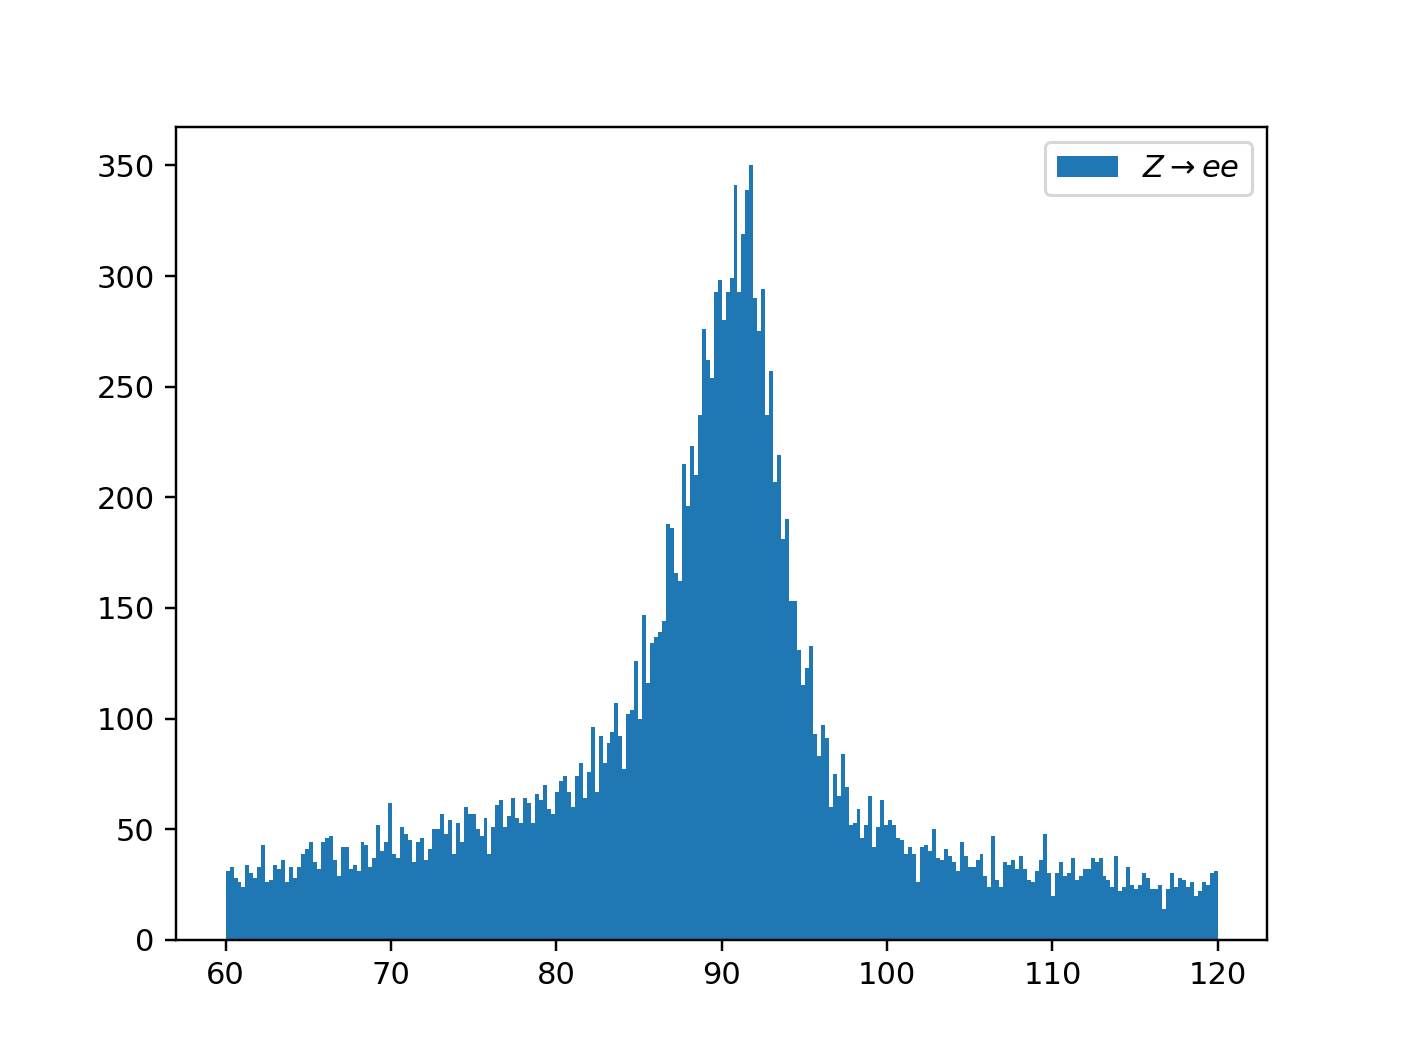

In [59]:
inv_mass = np.sqrt(2*df.pt1*df.pt2*(np.cosh(df.eta1 - df.eta2) - np.cos(df.phi1 - df.phi2)))
fig = plt.figure('Z -> ee Decay')
plt.hist(inv_mass,bins=250, label=r'$Z\rightarrow ee$')
plt.legend()


In [60]:
df['Invariant Mass']=inv_mass
df

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,Invariant Mass
0,163286,109060857,37.5667,2.289180,2.052600,-1,EE,0.025125,0.008973,0.00000,...,1.470640,-1.163050,1,EB,0.000753,0.000000,0.000000,1.019030,0.000000,89.589562
1,163286,109275715,36.2901,-0.837253,-1.585920,1,EB,0.007829,0.043751,0.00000,...,-0.489570,1.049600,-1,EB,0.011246,0.000000,0.718473,1.846060,0.000000,92.252290
2,163286,109075352,25.9705,-0.697420,1.635990,-1,EB,0.009715,0.040728,6.28701,...,-2.040090,3.118750,1,EE,0.025972,0.028008,15.217000,4.533720,3.836990,67.859158
3,163286,109169766,41.0075,1.461920,-0.532464,1,EB,0.008753,0.000000,0.00000,...,1.156060,2.478580,-1,EB,0.008590,0.000000,0.000000,2.438830,0.567555,87.604923
4,163286,108947653,39.8985,-0.592666,-2.394720,1,EB,0.015261,0.000000,2.54347,...,-2.244440,0.610610,-1,EE,0.029025,0.000000,12.422900,0.453359,0.909608,101.426755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,165993,1245864355,67.9728,0.591181,2.824340,-1,EB,0.009989,0.000000,0.00000,...,0.566588,0.203395,1,EB,0.008893,0.000000,0.000000,2.057180,0.000000,91.232354
18881,165993,1245110568,42.8005,-2.291330,0.779165,1,EE,0.023484,0.037901,0.00000,...,-1.640510,-2.741140,-1,EE,0.010058,0.007301,1.281670,2.016500,1.873110,95.750631
18882,165993,1245123133,25.4359,0.137592,2.641270,1,EB,0.010615,0.000000,0.00000,...,1.518880,-0.962316,-1,EE,0.017345,0.012618,1.204430,2.216630,1.233750,88.378684
18883,165993,1245207259,51.1762,0.778649,2.683120,-1,EB,0.009085,0.000000,4.71019,...,-0.386661,-0.451479,-1,EB,0.011314,0.106511,25.312100,12.257500,11.483000,92.069605


# Problem 3

The Relativistic Breit-Wigner distribution is expected to describe the , which is given as

Wikepedia: https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution

$f(E) = \frac{k}{(E^2 -M^2)^2 + M^2\Gamma^2}$, where

 * $\gamma$ = $\sqrt{M^2(M^2+\Gamma^2)}$
 * $k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi\sqrt{M^2+\gamma}}$
 
 Where $E$ is the energy, $M$ is the mass value where the function will peak. 
 Fit the invariant mass distribution with the function:
 
 $aE + b + cf(E)$,
 
 where $a, b, $ and $c$ are fit parameters to be deterimined by your fit that describe a linear background, and $f(E)$ is the Relativistic Breit-Wigner function described above. To do this you should make a function that takes as agruments: $\Gamma, M, a, b, c$. Where $\Gamma$ and $M$ are contained in the Breit-Wigner function ($f(E)$). Our fit will determine the values $\Gamma, M, a, b, c$. The value of $M = m_{inv}$ and should be near where the distribution peaks.   
 
 Fit the distribution and calculate the reduced $\chi^2$. You can use either the *curve_fit* function form Scipy or the MC fitting approach.
 
 What is your best invariant mass value according to your fit? How does this compare to the accepted value of the $Z$ boson mass (you can look it up on Wikipedia)?

In [61]:
def breitwigner_rel(E, gamma, M, a, b, c):
    little_gamma = np.sqrt(M**2*(M**2 + gamma**2))
    k = 2*np.sqrt(2)*M*gamma*little_gamma/(np.pi*np.sqrt(M**2 + little_gamma))
    return a*E + b + c*(k/((E**2 - M**2)**2 + M**2 * gamma**2))

<IPython.core.display.Javascript object>


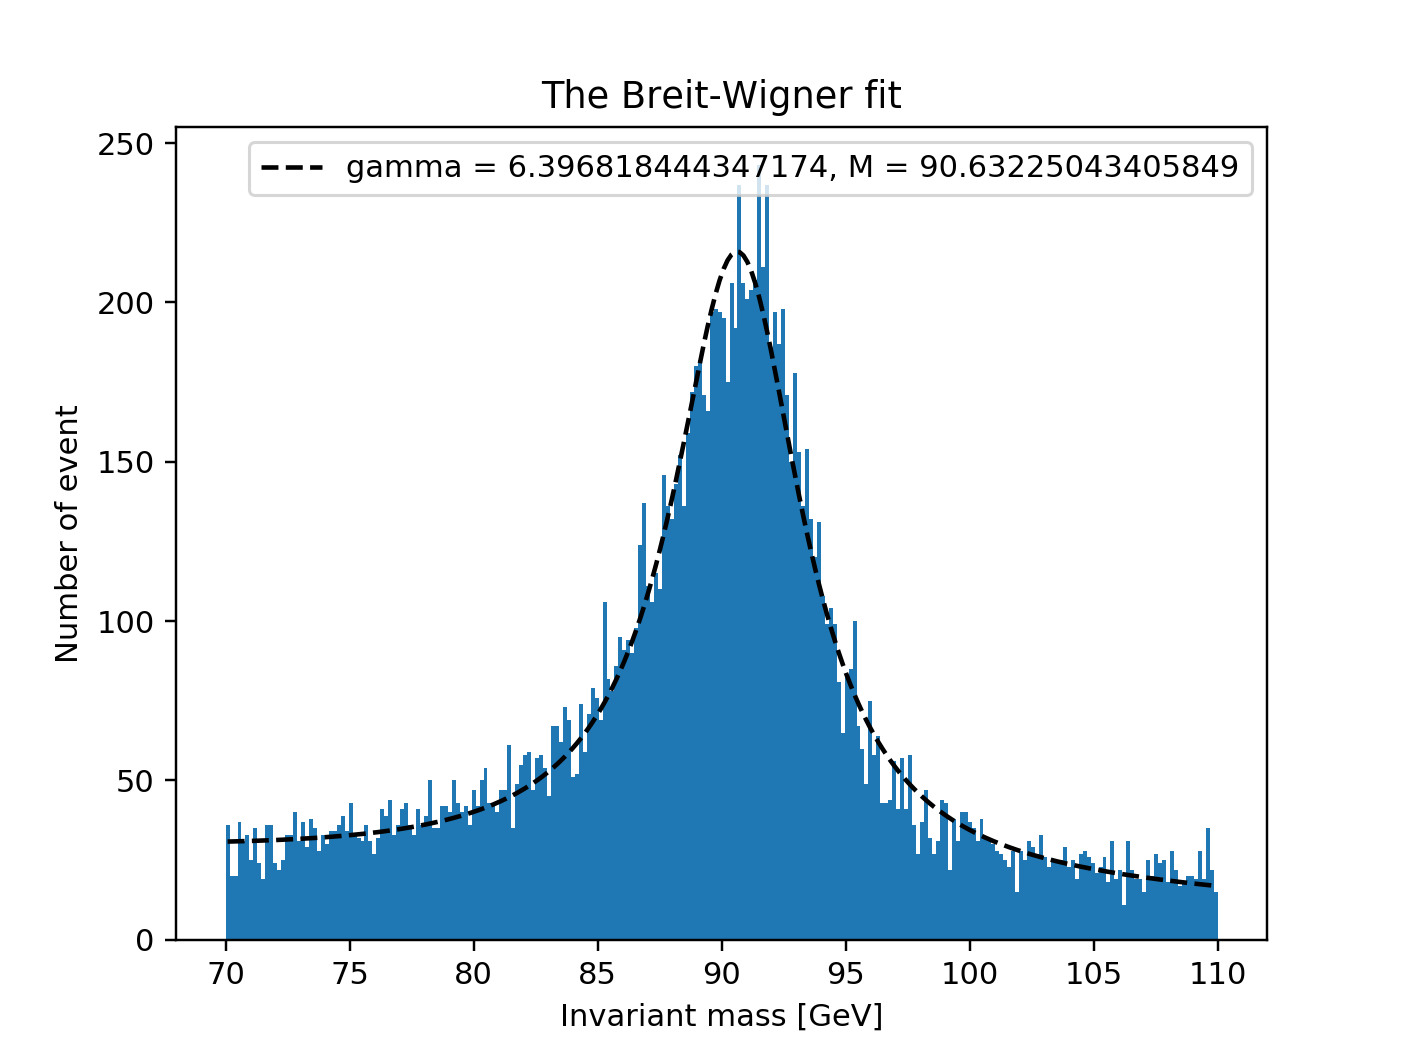

(array([ 36.,  20.,  20.,  37.,  31.,  33.,  25.,  35.,  24.,  19.,  36.,
        36.,  24.,  22.,  25.,  33.,  33.,  40.,  31.,  37.,  29.,  38.,
        35.,  28.,  33.,  30.,  34.,  34.,  36.,  39.,  34.,  43.,  33.,
        32.,  31.,  36.,  31.,  27.,  32.,  41.,  39.,  44.,  33.,  36.,
        41.,  43.,  36.,  33.,  41.,  36.,  39.,  50.,  35.,  35.,  42.,
        42.,  40.,  50.,  43.,  40.,  42.,  36.,  47.,  42.,  50.,  54.,
        43.,  42.,  40.,  47.,  47.,  61.,  35.,  49.,  55.,  58.,  59.,
        47.,  57.,  58.,  54.,  45.,  67.,  67.,  62.,  73.,  69.,  51.,
        52.,  74.,  59.,  71.,  79.,  76.,  69., 106.,  82.,  78.,  86.,
        95.,  91.,  94.,  90.,  98., 124., 137., 111., 106., 115., 110.,
       146., 136., 132., 143., 152., 136., 159., 172., 180., 182., 171.,
       166., 197., 198., 197., 195., 175., 206., 192., 237., 206., 201.,
       204., 207., 243., 211., 237., 186., 197., 187., 198., 171., 150.,
       178., 153., 136., 154., 132., 120., 131., 1

In [62]:
lowerlimit = 70
upperlimit = 110
bins = 250

fig = plt.figure()
hist_ee = plt.hist(inv_mass, bins=bins, range=(lowerlimit,upperlimit))
print(hist_ee)
print(hist_ee[0][:]) 
print(hist_ee[1][:])

y_ee = hist_ee[0] 
x_ee = 0.5*( hist_ee[1][0:-1] + hist_ee[1][1:] ) #centre of the bin
y_ee_error = np.sqrt(y_ee)
for i in range (len(y_ee)):
    if y_ee_error[i] == 0:
        y_ee_error[i] = 1.0
    else:
        y_ee_error[i] = y_ee_error[i]


initials = [2.5,91,-2, 200, 13000]
best_ee, covariance_ee = curve_fit(breitwigner_rel, x_ee, y_ee, p0=initials, sigma=y_ee_error)
error_ee = np.sqrt(np.diag(covariance_ee))        

plt.plot(x_ee, breitwigner_rel(x_ee, *best_ee), 'k--', label='gamma = {}, M = {}'.format(best_ee[0], best_ee[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend();

In [63]:
chisq = np.sum ((y_ee-breitwigner_rel(x_ee,*best_ee))**2/y_ee_error**2)
dof = len (y_ee) - len(best_ee)-1
rchisq = chisq/dof
pvalue = sp.gammaincc(dof/2.0, chisq/2.0)

print ("Chi Square",chisq)
print ("Degree of Freedom",dof)
print ("Reduced Chi Square",rchisq)
print ("P value",pvalue)


Chi Square 362.8235778646176
Degree of Freedom 244
Reduced Chi Square 1.4869818764943346
P value 1.171503990303123e-06


In [64]:
print ('The best value for Invariant Mass per the fit is 90.63225043405849 GeV/c^2')
print ('The accepted value for Z Boson Mass is 91.1876 ± 0.0021 GeV/c^2')
print ('Hence the best value for Invariant Mass obtained by the fit is slightly/ negligibly less than the Accepted Z Boson Mass')

The best value for Invariant Mass per the fit is 90.63225043405849 GeV/c^2
The accepted value for Z Boson Mass is 91.1876 ± 0.0021 GeV/c^2
Hence the best value for Invariant Mass obtained by the fit is slightly/ negligibly less than the Accepted Z Boson Mass


# Problem 4

On the same graph, make histograms of the $\eta_1$ and $\eta_2$ distributions. Be sure to include a legend so the two distributions can be distinquised.

<IPython.core.display.Javascript object>


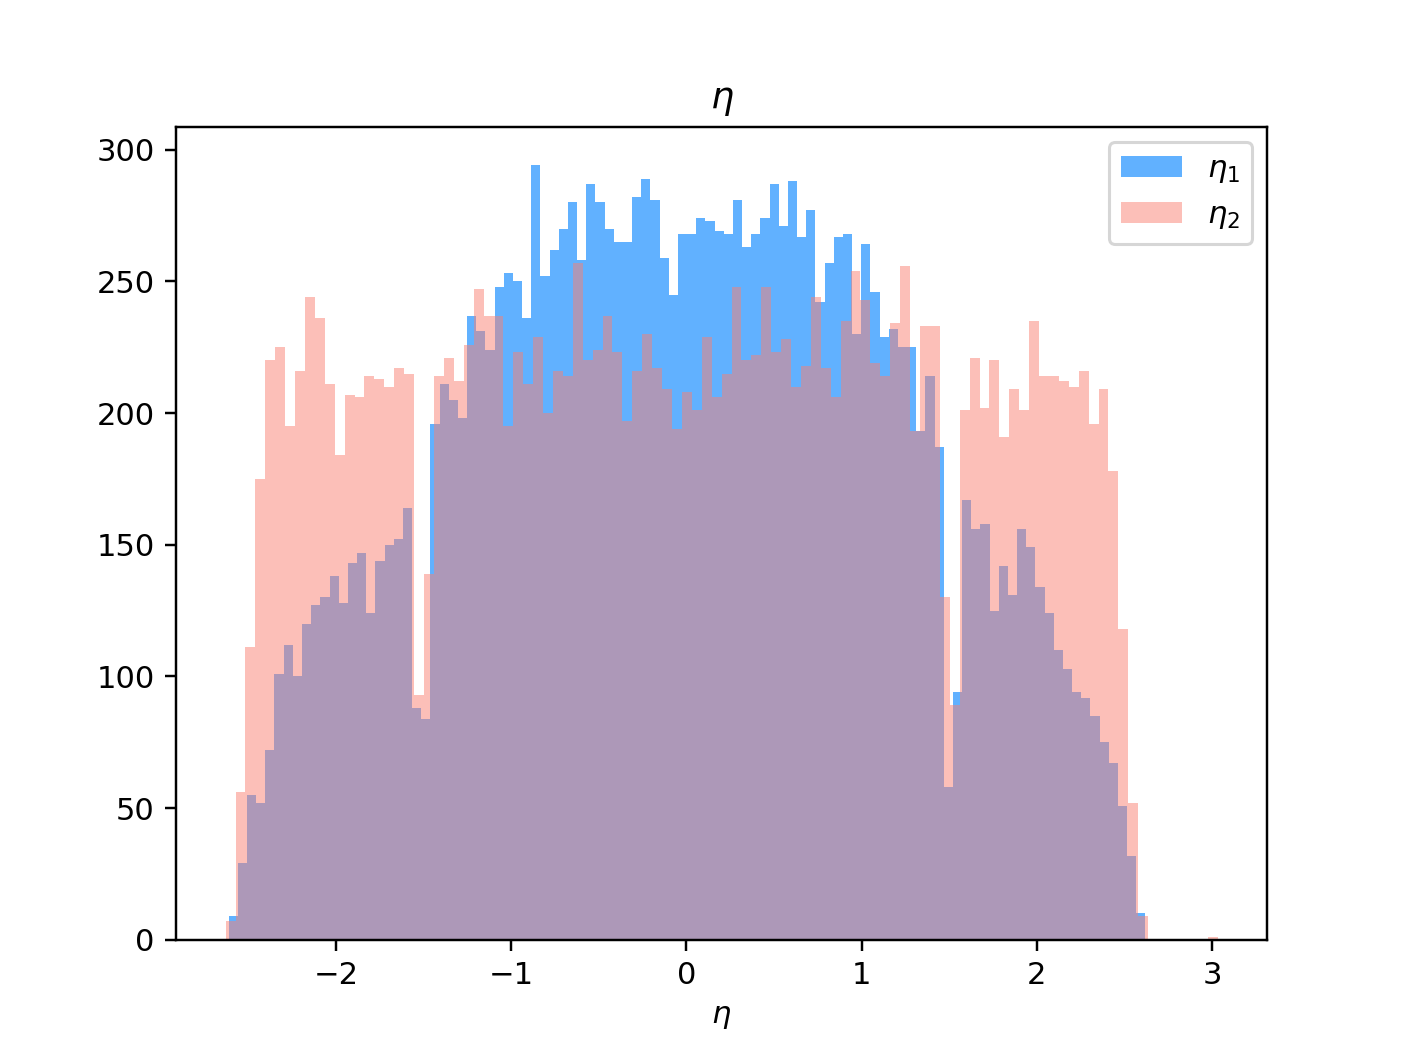

In [65]:
fig = plt.figure('Eta1 and Eta 2')
plt.hist(df.eta1,bins = 100,alpha = 0.7, color = 'dodgerblue',label =r'$\eta_1$')
plt.hist(df.eta2,bins = 100,alpha = 0.5, color = 'salmon',label = r'$\eta_2$')
plt.xlabel(r'$\eta$')
plt.title(r'$\eta$')
plt.legend();

# Problem 5

From the distribution above, we clearly see two distinct distributions in the histogram. We can explain this due to the decay being detected in two different detectors, the electromagnetic barrel calorimeter (EB) and the endcap electromagnetic calorimeter (EE). This distinction is made in the column labeled *type1* and *type2*, which tells us which detector particle 1 and particle 2 are detected in. 

Create two DataFrames *barrel* and *endcap*, where *barrel* keeps all of the information in the original DataFrame where both particles were detected in the EB, and *endcap* keeps all of the information in the original DataFrame where both particles were detected in the EE.

Make two sub plots where in sub plot one you histogram the $\eta1$ distribution for the particles in the EB and EE. Then in sub plot two histogram the $\eta2$ distribution for particles detected in the EE and EB. Be sure to include a legend that distiquishes EB from EE events.

Based on the information above, does our assumption that the $\eta$ distribution looks the way it does is because of the two different detectors make sense? Based on your histograms, what is the rough $\eta$ ranges covered by the EB and EE detectors?

In [66]:
barrel = df[ (df['type1'] == 'EB') & (df['type2'] == 'EB') ]

In [67]:
barrel

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,Invariant Mass
1,163286,109275715,36.2901,-0.837253,-1.585920,1,EB,0.007829,0.043751,0.000000,...,-0.489570,1.049600,-1,EB,0.011246,0.000000,0.718473,1.846060,0.000000,92.252290
3,163286,109169766,41.0075,1.461920,-0.532464,1,EB,0.008753,0.000000,0.000000,...,1.156060,2.478580,-1,EB,0.008590,0.000000,0.000000,2.438830,0.567555,87.604923
8,163286,110268001,32.3642,-0.534036,-2.671810,-1,EB,0.010885,0.084310,4.735460,...,1.390990,0.074385,1,EB,0.018003,0.000000,12.425400,4.161900,7.455390,107.871480
9,163286,110085994,31.4123,-0.216362,1.295420,-1,EB,0.011808,0.109559,18.832500,...,-1.275780,-2.123470,-1,EB,0.008661,0.000000,20.437700,6.422420,2.400630,82.870251
10,163286,110297282,27.4283,0.555189,-1.477450,-1,EB,0.011236,0.024642,2.413560,...,1.345060,1.839490,1,EB,0.008359,0.039660,16.518100,6.173470,4.026230,63.908132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18877,165993,1245482967,47.4890,-0.577628,-2.085860,-1,EB,0.009257,0.000000,0.889618,...,-0.829896,1.194170,1,EB,0.008472,0.000000,1.834520,0.812211,0.000000,106.378991
18878,165993,1245947586,26.2686,1.378270,0.130022,1,EB,0.013638,0.133119,2.421380,...,-0.596051,2.936470,-1,EB,0.013086,0.029424,10.131200,12.026200,6.510080,98.051249
18879,165993,1245752052,39.0030,0.527312,-1.577130,1,EB,0.008435,0.000000,0.000000,...,-0.601777,1.391160,-1,EB,0.009515,0.000000,0.000000,0.679768,0.000000,92.319295
18880,165993,1245864355,67.9728,0.591181,2.824340,-1,EB,0.009989,0.000000,0.000000,...,0.566588,0.203395,1,EB,0.008893,0.000000,0.000000,2.057180,0.000000,91.232354


In [68]:
endcap = df[ (df['type1'] == 'EE') & (df['type2'] == 'EE') ]

In [69]:
endcap

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,Invariant Mass
18,163286,110668790,47.5727,-2.21799,-0.815233,1,EE,0.047381,0.101574,11.44980,...,-1.65760,2.205370,1,EE,0.015067,0.000000,16.22110,17.577900,6.944010,108.762459
34,163286,111543719,30.2060,-2.21116,-0.568794,1,EE,0.028541,0.083570,10.36010,...,-2.07269,2.675020,-1,EE,0.023669,0.000000,13.42790,2.798580,5.387030,63.303419
41,163286,111928032,28.0401,2.33037,-2.839090,-1,EE,0.022362,0.093207,1.67281,...,2.25950,0.682708,-1,EE,0.025076,0.000000,0.00000,1.782290,2.103800,63.464241
54,163297,107872385,34.8294,1.58033,0.952320,1,EE,0.020969,0.089095,29.41750,...,2.20522,-2.246120,1,EE,0.021211,0.050607,13.74550,0.899345,7.974280,107.488939
69,163297,108833939,28.8562,1.89139,2.649820,1,EE,0.016848,0.000000,1.52530,...,2.41843,-0.540512,1,EE,0.038014,0.084379,0.00000,0.938821,3.900330,66.368034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,165993,1244645288,43.7571,-2.29965,2.999580,-1,EE,0.021766,0.012943,0.00000,...,-2.52233,0.126262,1,EE,0.029928,0.000000,0.00000,0.263447,1.809650,92.493905
18863,165993,1244250002,27.8002,-1.53904,2.186070,1,EE,0.008698,0.065986,0.00000,...,-2.40776,-0.037206,-1,EE,0.028078,0.000000,0.00000,0.481085,0.334517,86.479053
18872,165993,1244204126,51.8952,-1.98757,0.947703,1,EE,0.017641,0.000000,0.00000,...,-1.90825,-2.054560,-1,EE,0.016586,0.011688,1.32125,1.682330,1.102710,91.914141
18875,165993,1245278225,30.5801,1.74794,-3.088930,1,EE,0.014878,0.000000,0.00000,...,2.34251,1.002030,-1,EE,0.022687,0.000000,0.00000,0.266132,0.000000,87.267772


<IPython.core.display.Javascript object>


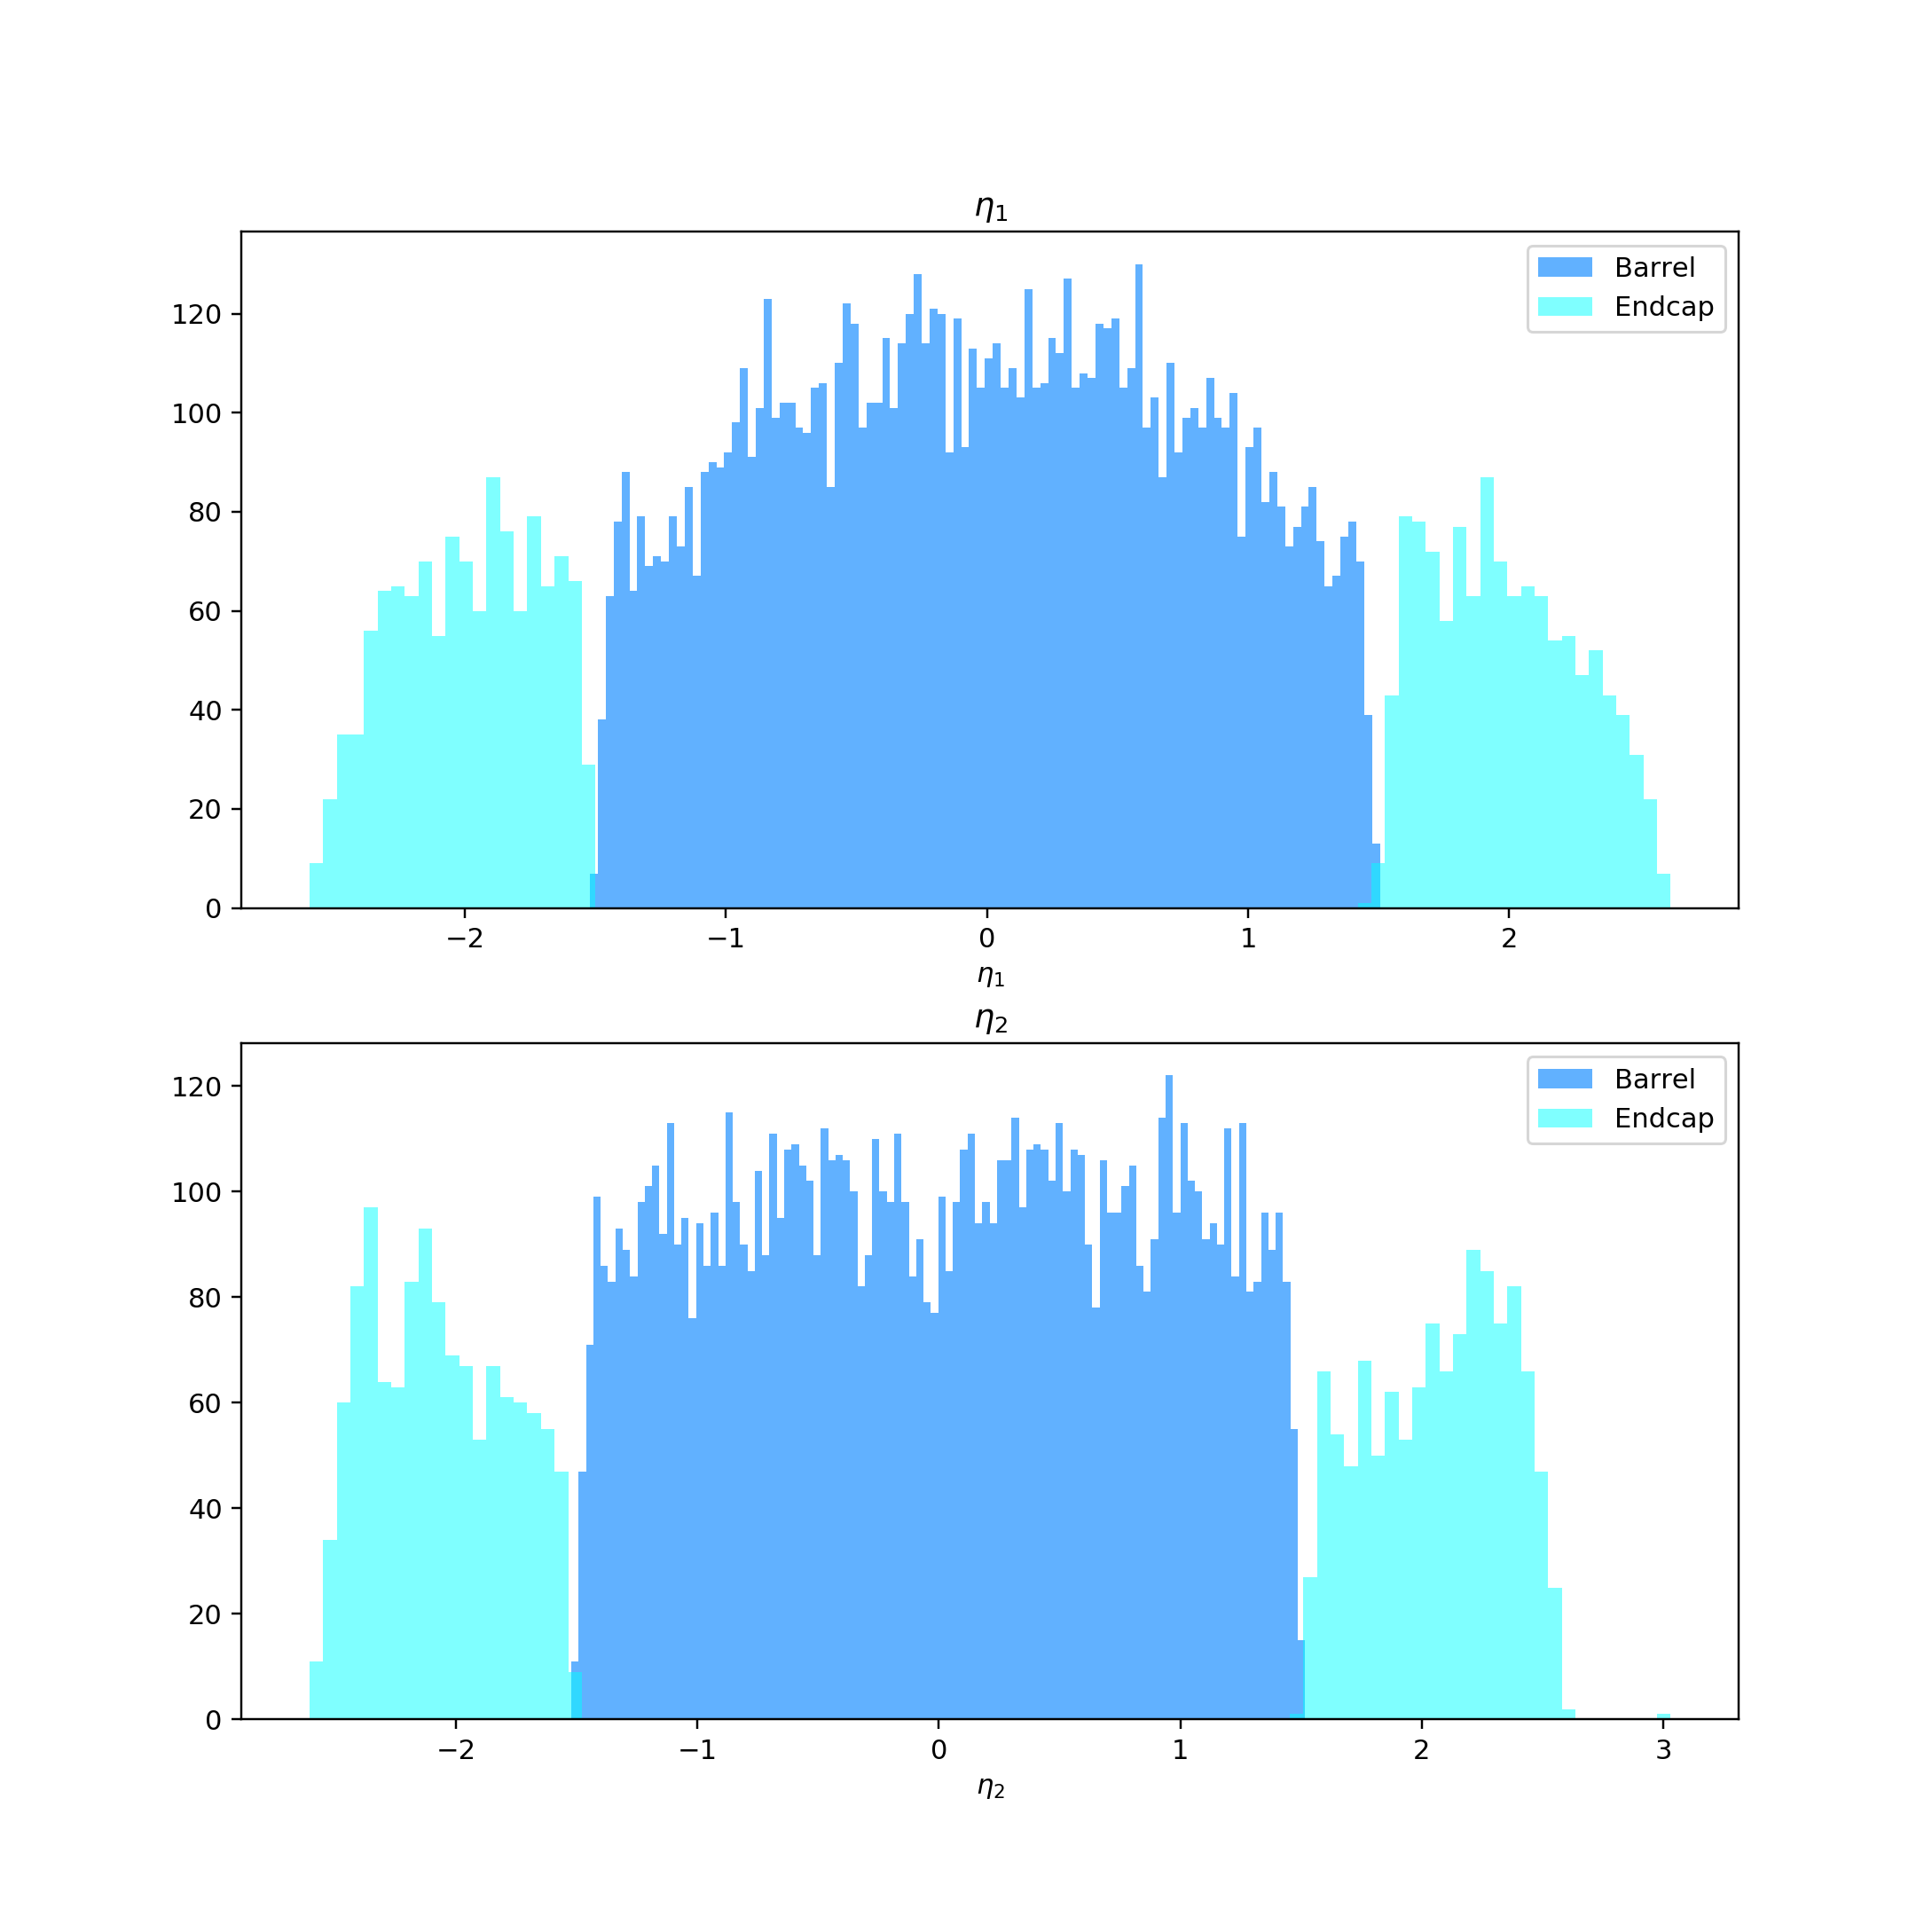

In [70]:
fig= plt.figure('Subplots of η1 and η2 for Barrel and Endcap',figsize =[9.9,9.9])
plt.subplot(211)
plt.title(r'$\eta_1$')
plt.hist (barrel['eta1'], bins = 100, color = 'dodgerblue',alpha = 0.7,label = 'Barrel')
plt.hist (endcap['eta1'], bins = 100, color = 'aqua',alpha = 0.5,label = 'Endcap')
plt.xlabel(r'$\eta_1$')
plt.legend()

plt.subplot (212)
plt.title(r'$\eta_2$')
plt.hist (barrel['eta2'], bins = 100, color = 'dodgerblue',alpha = 0.7,label = 'Barrel')
plt.hist (endcap['eta2'], bins = 100, color = 'aqua',alpha = 0.5,label = 'Endcap')
plt.xlabel(r'$\eta_2$')
plt.legend();

In [71]:
endcap.max()

Run                   173663
Event             1741225672
pt1                  259.535
eta1                 2.61893
phi1                 3.13893
Q1                         1
type1                     EE
sigmaEtaEta1       0.0717736
HoverE1              2.22955
isoTrack1            336.262
isoEcal1             38.3262
isoHcal1             28.1525
pt2                  211.717
eta2                  3.0308
phi2                 3.13956
Q2                         1
type2                     EE
sigmaEtaEta2       0.0619331
HoverE2             0.307157
isoTrack2            75.1093
isoEcal2             25.6824
isoHcal2             21.8681
Invariant Mass       119.807
dtype: object

In [72]:
endcap.min()

Run                   160873
Event                  88045
pt1                  25.0066
eta1                -2.59511
phi1                -3.13992
Q1                        -1
type1                     EE
sigmaEtaEta1      0.00514118
HoverE1                    0
isoTrack1                  0
isoEcal1                   0
isoHcal1                   0
pt2                  25.0101
eta2                -2.60551
phi2                -3.13977
Q2                        -1
type2                     EE
sigmaEtaEta2      0.00738482
HoverE2                    0
isoTrack2                  0
isoEcal2                   0
isoHcal2                   0
Invariant Mass       60.0188
dtype: object

In [73]:
barrel.max()

Run                   173663
Event             1741284105
pt1                  253.039
eta1                 1.50485
phi1                 3.14123
Q1                         1
type1                     EB
sigmaEtaEta1         0.02582
HoverE1             0.565348
isoTrack1            472.461
isoEcal1             79.6421
isoHcal1             78.4444
pt2                   290.51
eta2                 1.51633
phi2                 3.14147
Q2                         1
type2                     EB
sigmaEtaEta2       0.0278182
HoverE2                1.274
isoTrack2            205.613
isoEcal2             74.7395
isoHcal2              72.493
Invariant Mass       119.968
dtype: object

In [74]:
barrel.min()

Run                    160873
Event                   78091
pt1                    25.003
eta1                 -1.52125
phi1                 -3.14155
Q1                         -1
type1                      EB
sigmaEtaEta1      0.000398042
HoverE1                     0
isoTrack1                   0
isoEcal1             0.190599
isoHcal1                    0
pt2                   25.0024
eta2                 -1.52142
phi2                 -3.14017
Q2                         -1
type2                      EB
sigmaEtaEta2       0.00032835
HoverE2                     0
isoTrack2                   0
isoEcal2             0.218703
isoHcal2                    0
Invariant Mass        60.0016
dtype: object

In [75]:
print("Based on the graph above the 𝜂 distribution because of the two different detectors does make sense")
print("The Eta 1 and Eta 2 values for Barrel Detector ranges roughly from -1.5 to +1.5")
print("The Eta 1 and Eta 2 values for Endcap Deranges roughly from -1.5 to -2.5 and from +1.5 to +2.5")

Based on the graph above the 𝜂 distribution because of the two different detectors does make sense
The Eta 1 and Eta 2 values for Barrel ranges roughly from -1.5 to +1.5
The Eta 1 and Eta 2 values for Endcap ranges roughly from -1.5 to -2.5 and from +1.5 to +2.5


# Problem 6

With particles being detected in two different detectors, the resolution of the detectors could differ. This could reslt in measureing the boson mass better in one detector than the other.

Using your *barrel* and *endcap* DataFrames from above, on the same graph make a histogram of the invariant mass measured in the barrel and endcap detectors.  

Use the *std* function to get the standard deviation of the two invariant mass distributions. The standard deviation is reflective of how narrow our mass peak is. Which detector gives the better resolution and hence the narrower invariant mass distribution? Does your histogram support the same conclusion?

<IPython.core.display.Javascript object>


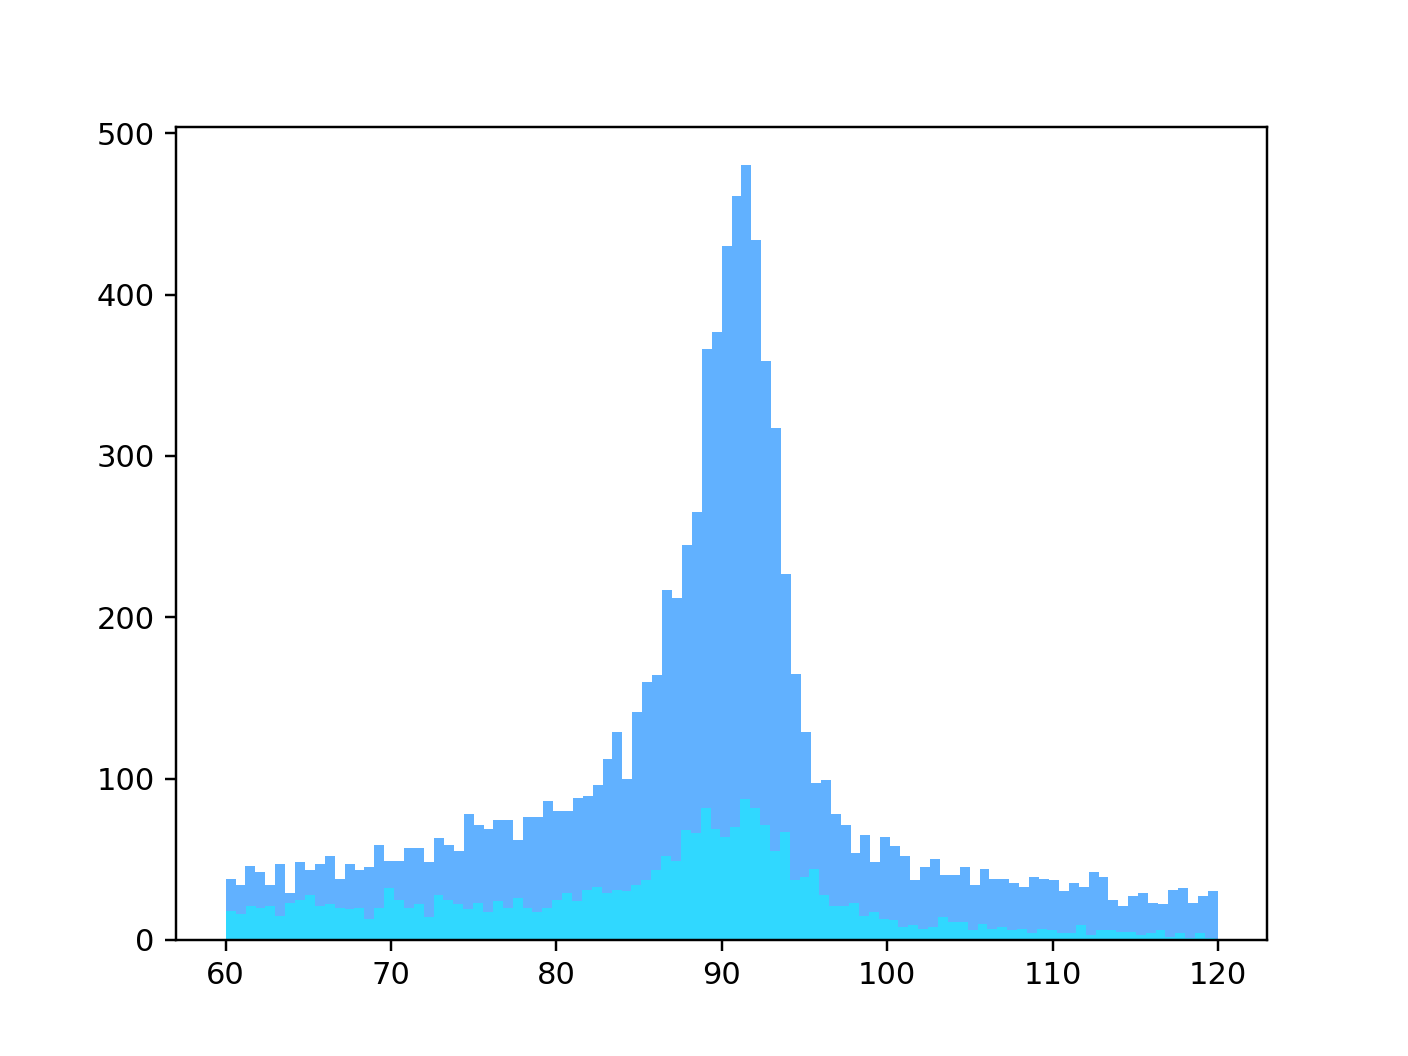

(array([18., 16., 21., 20., 21., 15., 23., 25., 28., 21., 22., 20., 19.,
        20., 13., 20., 32., 25., 20., 22., 14., 28., 25., 22., 19., 23.,
        17., 24., 20., 26., 20., 17., 20., 25., 29., 24., 31., 33., 29.,
        31., 30., 34., 37., 43., 52., 49., 68., 66., 82., 69., 64., 70.,
        87., 82., 71., 55., 67., 37., 39., 44., 28., 21., 21., 23., 15.,
        17., 13., 12.,  8.,  9.,  7.,  8., 14., 11., 11.,  6., 10.,  7.,
         8.,  6.,  7.,  4.,  7.,  6.,  4.,  4.,  9.,  3.,  6.,  6.,  5.,
         5.,  3.,  4.,  6.,  2.,  4.,  1.,  4.,  1.]),
 array([ 60.01877327,  60.61665555,  61.21453783,  61.81242011,
         62.41030239,  63.00818468,  63.60606696,  64.20394924,
         64.80183152,  65.3997138 ,  65.99759608,  66.59547836,
         67.19336064,  67.79124292,  68.3891252 ,  68.98700748,
         69.58488976,  70.18277204,  70.78065432,  71.3785366 ,
         71.97641888,  72.57430116,  73.17218344,  73.77006572,
         74.367948  ,  74.96583028,  75.56371256, 

In [383]:
fig = plt.figure()
plt.hist (barrel['Invariant Mass'], bins = 100, color = 'dodgerblue',alpha = 0.7,label = 'Barrel')
plt.hist (endcap['Invariant Mass'], bins = 100, color = 'aqua',alpha = 0.5,label = 'Endcap')


In [53]:
barrel_mass_std= barrel['Invariant Mass'].std()
endcap_mass_std= endcap['Invariant Mass'].std()
print('Standard Deviation of Invariant Mass in Barrel',barrel_mass_std)
print('Standard Deviation of Invariant Mass in Endcap',endcap_mass_std)
print('Barrel Detector gives a better resolution and a narrower Invariant Mass distribution')
print('Yes, the histogram does support the same conclusion')

Standard Deviation of Invariant Mass in Barrel 11.489115344078318
Standard Deviation of Invariant Mass in Endcap 12.229202324653295
Barrel Detector gives a better resolution and a narrower Invariant Mass distribution
Yes, the histogram does support the same conclusion


# Problem 7
From your DataFrame (from Problem 2), drop all columns except for pt1, eta1, phi1, pt2, eta2, phi2, and M. 
Using this DataFrame, use the Pandas *corr* function to produce a correlataion table. What quantites have the strongest correlation (that is not 1)?

In [342]:
df.drop(['Run','Event','Q1','type1','sigmaEtaEta1','HoverE1','isoTrack1','Q2','type2','sigmaEtaEta2','HoverE2','isoTrack2','isoEcal2','isoHcal2','isoEcal1','isoHcal1'],axis=1,inplace=True)
df

,pt1,eta1,phi1,pt2,eta2,phi2,Invariant Mass
0,37.5667,2.289180,2.052600,45.4315,1.470640,-1.163050,89.589562
1,36.2901,-0.837253,-1.585920,60.5754,-0.489570,1.049600,92.252290
2,25.9705,-0.697420,1.635990,45.2954,-2.040090,3.118750,67.859158
3,41.0075,1.461920,-0.532464,45.9013,1.156060,2.478580,87.604923
4,39.8985,-0.592666,-2.394720,34.8931,-2.244440,0.610610,101.426755
...,...,...,...,...,...,...,...
18880,67.9728,0.591181,2.824340,32.7795,0.566588,0.203395,91.232354
18881,42.8005,-2.291330,0.779165,49.8503,-1.640510,-2.741140,95.750631
18882,25.4359,0.137592,2.641270,50.9959,1.518880,-0.962316,88.378684
18883,51.1762,0.778649,2.683120,30.0143,-0.386661,-0.451479,92.069605


In [343]:
df.corr()


,pt1,eta1,phi1,pt2,eta2,phi2,Invariant Mass
pt1,1.000000,-0.005495,-0.000376,-0.068503,-0.009661,-0.000184,0.279797
eta1,-0.005495,1.000000,0.015935,0.009975,0.665429,-0.022004,0.010426
phi1,-0.000376,0.015935,1.000000,0.000893,0.007323,-0.460515,-0.000727
pt2,-0.068503,0.009975,0.000893,1.000000,0.010027,-0.000399,0.342749
eta2,-0.009661,0.665429,0.007323,0.010027,1.000000,-0.023955,0.002616
phi2,-0.000184,-0.022004,-0.460515,-0.000399,-0.023955,1.000000,-0.015139
Invariant Mass,0.279797,0.010426,-0.000727,0.342749,0.002616,-0.015139,1.000000


<IPython.core.display.Javascript object>


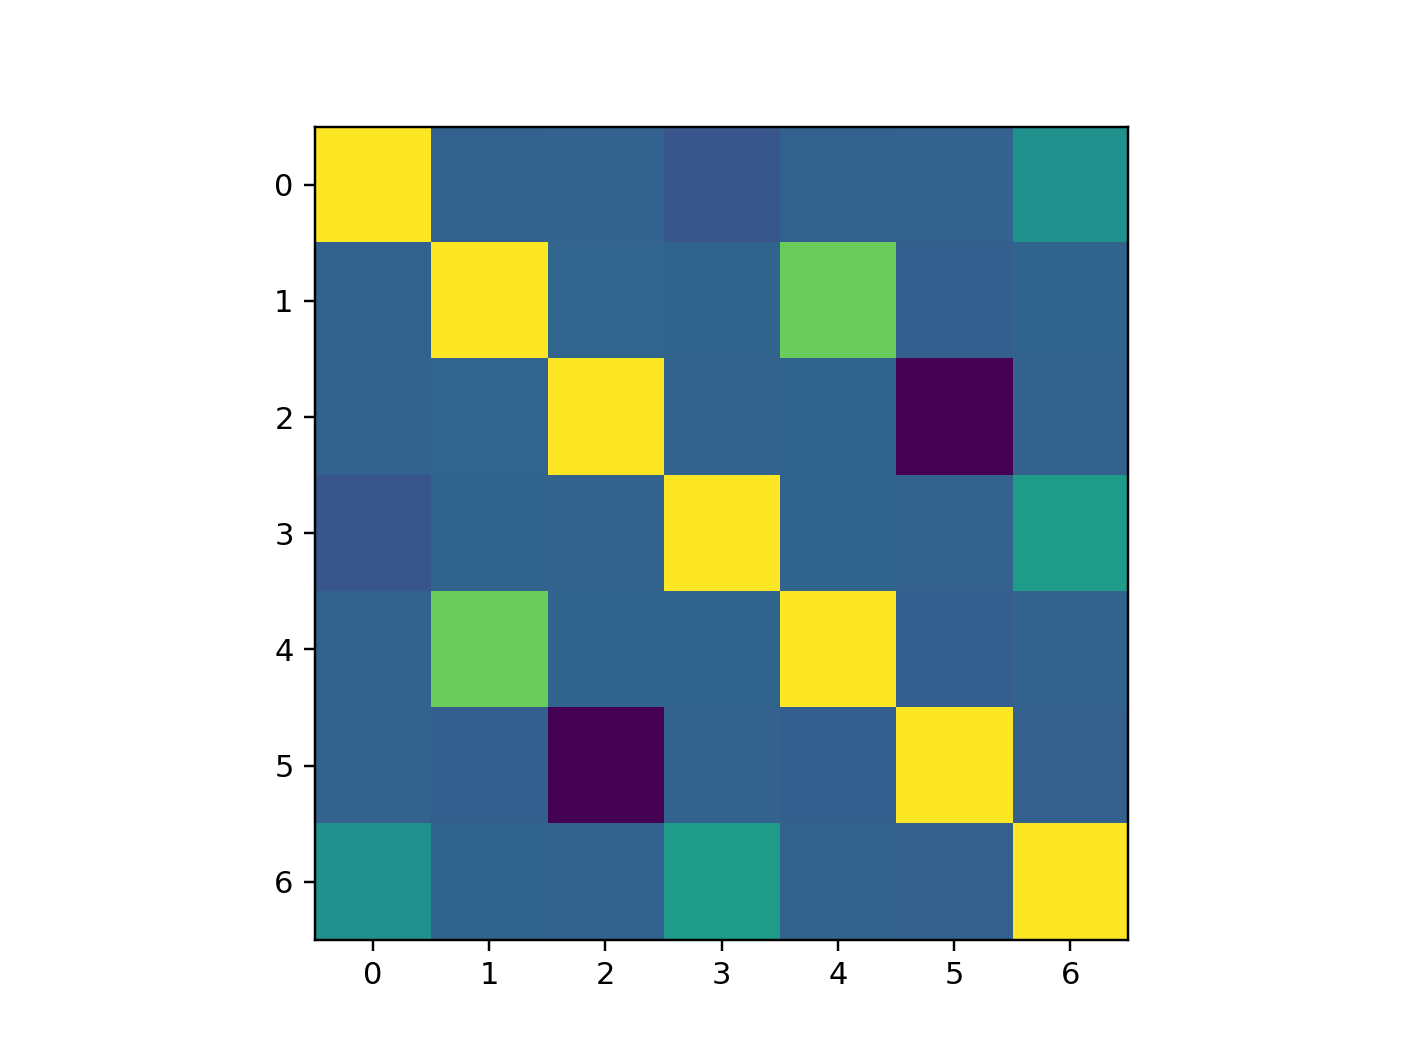

In [344]:
fig = plt.figure()
plt.imshow(df.corr())


In [345]:
import seaborn as sns

<IPython.core.display.Javascript object>


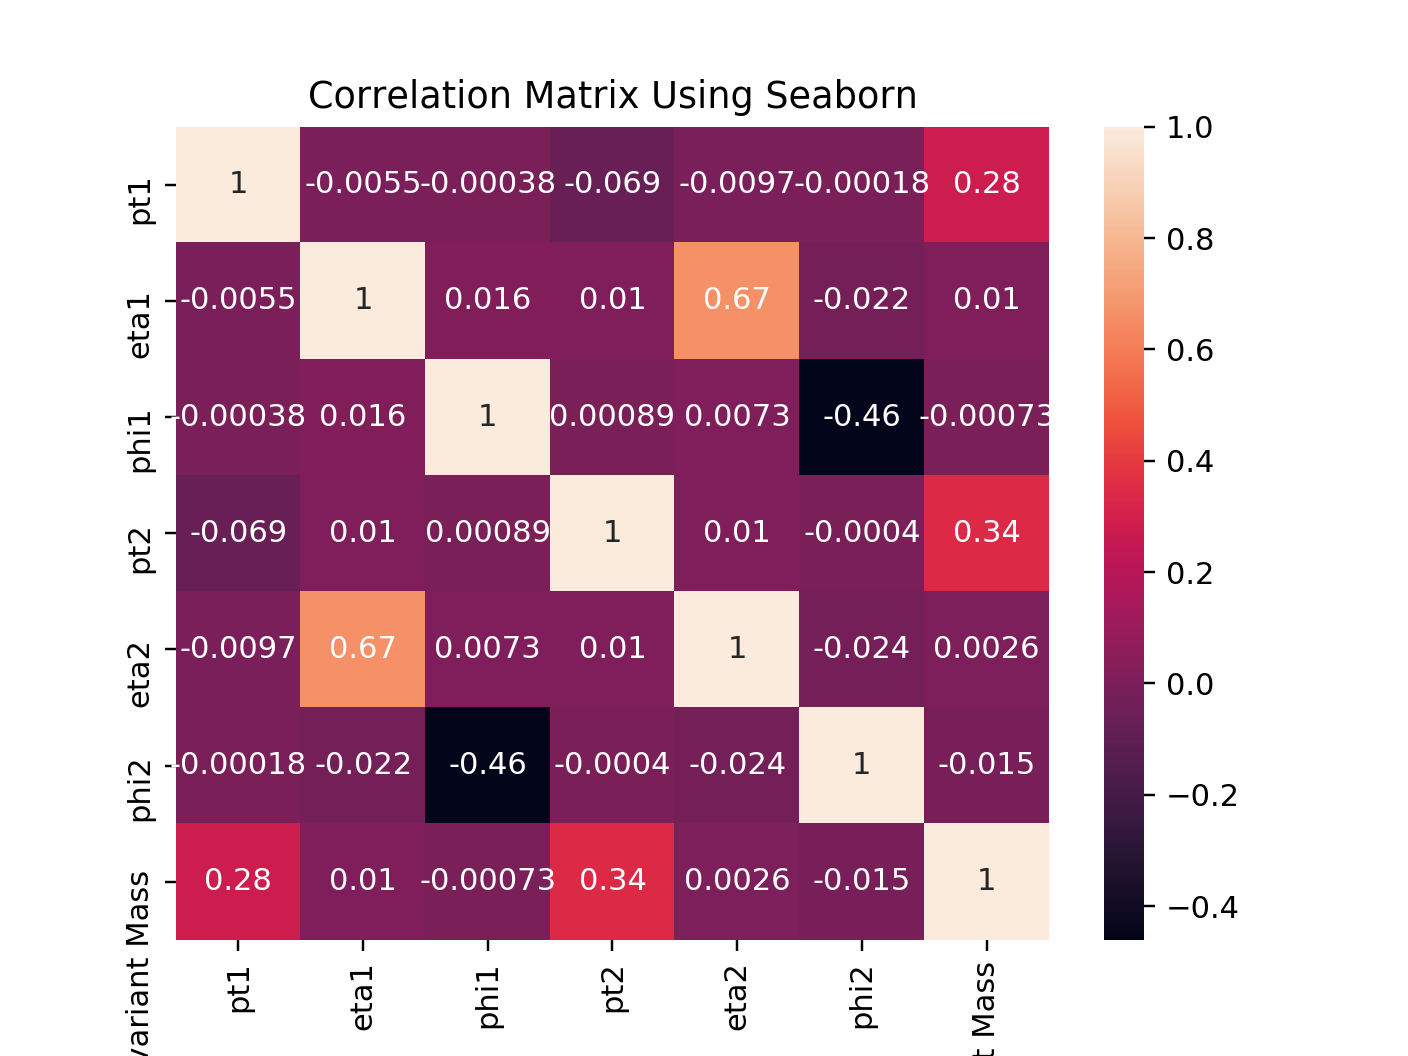

In [346]:
fig = plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix Using Seaborn');

In [347]:
print("eta1 and eta2 have the highest correlation which is not equal to 1")


eta1 and eta2 have the highest correlation which is not equal to 1
